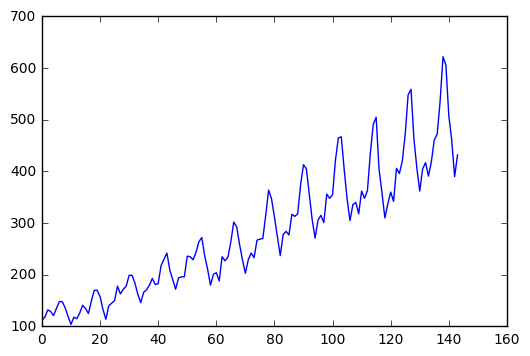

In [17]:
#predict passengers using time series analysis of past data
#convert it into a regrassion problem. Given this month's passengers, try to predict next month's passengers

import pandas
import matplotlib.pyplot as plt
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense

numpy.random.seed(7)
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

In [18]:
# split data into train and test set in ratio 2:1

train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train), len(test))


(96, 48)


In [19]:
#x number of passenger at t
#y number of passenger at t+1

#convert array of values into matrix

def create_dataset(dataset,look_back=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

#prep the train and test data in the form of t , t+1

look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)


In [20]:
#fit Multilayer perceptron
#1 input layer , 1 hidden layer with 8 neurons , output layer
#model fot using mean squared error

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=250, batch_size=5, verbose=2)

Epoch 1/250
0s - loss: 50546.4914
Epoch 2/250
0s - loss: 44246.6844
Epoch 3/250
0s - loss: 38516.5285
Epoch 4/250
0s - loss: 33226.4994
Epoch 5/250
0s - loss: 28474.5133
Epoch 6/250
0s - loss: 24154.6578
Epoch 7/250
0s - loss: 20457.4472
Epoch 8/250
0s - loss: 17063.7953
Epoch 9/250
0s - loss: 14151.5814
Epoch 10/250
0s - loss: 11579.5908
Epoch 11/250
0s - loss: 9410.5231
Epoch 12/250
0s - loss: 7615.8191
Epoch 13/250
0s - loss: 6053.0833
Epoch 14/250
0s - loss: 4831.5178
Epoch 15/250
0s - loss: 3788.4884
Epoch 16/250
0s - loss: 2998.2158
Epoch 17/250
0s - loss: 2337.4387
Epoch 18/250
0s - loss: 1864.8214
Epoch 19/250
0s - loss: 1487.0203
Epoch 20/250
0s - loss: 1208.5846
Epoch 21/250
0s - loss: 998.3788
Epoch 22/250
0s - loss: 855.8018
Epoch 23/250
0s - loss: 754.2545
Epoch 24/250
0s - loss: 679.9778
Epoch 25/250
0s - loss: 627.6912
Epoch 26/250
0s - loss: 597.9187
Epoch 27/250
0s - loss: 575.6665
Epoch 28/250
0s - loss: 560.2281
Epoch 29/250
0s - loss: 552.8779
Epoch 30/250
0s - loss

In [21]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 534.51 MSE (23.12 RMSE)
Test Score: 2366.25 MSE (48.64 RMSE)


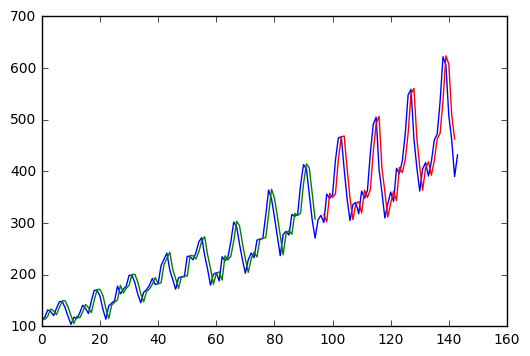

In [22]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()